In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from astropy.table import Table

google_doc = 'https://docs.google.com/spreadsheets/d/1cf1aP3fcmBo-0RkrhZbpZbrYIKIM082OhaGf79p8a5c/export?format=xlsx'
points_log = pd.read_excel(google_doc, index_col='name')

In [63]:
points_log['total'] = points_log.sum(axis=1)

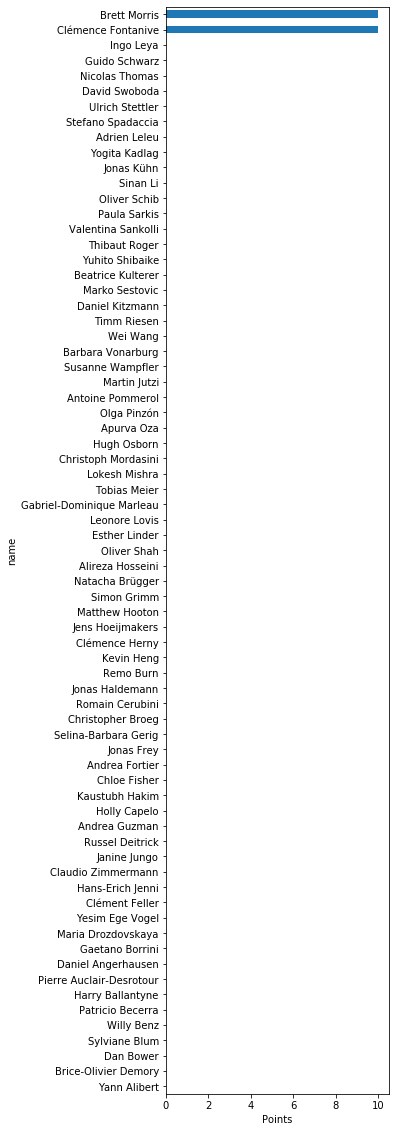

In [134]:
fig, ax = plt.subplots(figsize=(4, 20))
points_log.sort_values('total', inplace=True)
points_log.total.plot.barh(ax=ax)
ax.set_xlabel('Points')
plt.show()

In [136]:
header = """"
astro-ph Coffee Bern
====================
"""
footer = """
by Brett Morris and Clémence Fontanive\n"

In [137]:
totals = points_log.sort_values('total', ascending=False).total
html_table = Table.from_pandas(totals.to_frame(), index=True)
html_table.write('README.rst', format='ascii.rst', overwrite=True)

In [138]:
with open('README.rst', 'r') as html: 
    unformatted_table = html.read().splitlines()
    
with open('README.rst', 'w') as html:
    html.write(f"{header}" + '\n'.join(unformatted_table) + f"{footer}")